# Facial Keypoints Detection

 - Version : 0.1
 - Python : 3

The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:

tracking faces in images and video
analysing facial expressions
detecting dysmorphic facial signs for medical diagnosis
biometrics / face recognition
Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.

**kaggale link **

https://www.kaggle.com/c/facial-keypoints-detection

** Data **

- train.csv
- test.csv
- testlabels.csv

In [28]:
#import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [29]:
# read data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv',header = None)
test_labels = pd.read_csv('data/testlabels.csv',header = None)

### Handle 'nan' in data

Drop corresponding image

In [30]:
train_data = train_data.dropna(axis=0, how='any')

In [31]:
test_labels = test_labels.iloc[:,1:]

In [32]:
print(train_data.shape)
print(test_data.shape)
print(test_labels.shape)

(993, 31)
(500, 2)
(500, 30)


In [33]:
test_labels.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,66.979368,33.665011,30.850526,34.794105,62.086737,34.794105,72.248421,35.170442,36.871579,35.546779,...,50.108632,48.452211,65.097263,70.546526,38.000842,69.417263,49.290947,61.890526,50.420211,79.202526
1,65.130173,36.037179,30.658960,36.037179,58.434035,37.277410,71.330220,36.533272,37.602590,37.029364,...,48.440046,53.176786,63.146358,71.500578,33.634960,71.748624,48.762451,64.556948,48.514405,80.924671
2,67.671429,42.036000,29.910857,37.412486,63.432857,41.651143,75.377143,43.962857,35.689714,37.797771,...,48.791143,60.145714,59.964857,81.723429,28.368857,78.255429,45.708000,75.173143,43.396286,91.356000
3,67.729394,35.792465,30.167104,36.504299,62.210788,35.436349,72.358108,36.148183,35.685710,36.504299,...,49.749112,53.772349,64.881261,72.464863,34.795419,73.354755,49.393394,71.752631,49.749112,83.145959
4,66.021293,36.013137,30.214737,35.367988,60.214376,36.335711,72.472782,36.980932,36.988872,36.335711,...,47.634045,58.916571,57.311278,78.593684,35.053714,78.593684,47.311398,73.110135,46.343459,87.948271


## Explore data

In [34]:
#display image

def get_image(row):
    
    keypoints = row[:30]
    #last column: image data
    lastcol = row[30]
    
    #split with space delimiter, strip unnecessary characters
    image = [int(x.strip()) for x in lastcol.split()]
    
    #image size is 96 x 96
    assert(len(image) == 96*96)
    
    return keypoints,image

def plot_image(row):
    
    keypoints, image = get_image(row)
    
    image_array = np.array(image, dtype=np.float32)
    #reshape to 96 x 96
    img = image_array.reshape((96,96))
    
    #plot image in grayscale
    plt.imshow(img, cmap='gray')


    #plot keypoints
    
    for i in range(len(keypoints)):
        if ((i) * 2)+1 <= len(keypoints):
            ind1 = (i) * 2
            ind2 = ind1+1
            
            keypoints = keypoints
            x,y = keypoints[ind1], keypoints[ind2]
            
            #add keypoint coordinates to the plot
            plt.scatter([x], [y])

    #show plot
    plt.show()


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  This is separate from the ipykernel package so we can avoid doing imports until


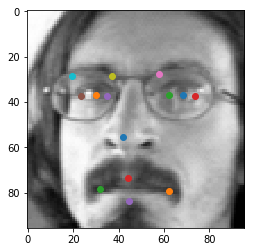

In [35]:
# plot images to check

plot_image(train_data.irow(206))

## prepare data

In [36]:
#Function to prepare train adn test data

def reshape_image(flat_array):
    
    return np.array(flat_array).reshape((96,96,1))
    

def prepare_data(data, train = True):
    
    features = []
    labels = []
    
    n_col = data.shape[1]
    
    for i,row in data.iterrows():
        
        features.append(reshape_image([int(x.strip()) for x in row[n_col-1].split()]))
        
        if (train):
            labels.append([y for y in row[:n_col-1]])
        
    
    return np.array(features),np.array(labels)    

In [37]:
# get train and test data

train_x, train_y = prepare_data(train_data)
test_x,_ = prepare_data(test_data,train = False)
test_y = test_labels.as_matrix()

In [38]:
test_x.shape

(500, 96, 96, 1)

In [39]:
#normalise data

train_x = train_x/255
train_y = train_y/95

test_x = test_x/255
test_y = test_y/95

In [40]:
# handle nan

train_y = np.nan_to_num(train_y)
test_y = np.nan_to_num(test_y)

In [41]:
train_y.shape

(993, 30)

In [42]:
test_y[1]

array([ 0.68558077,  0.37933873,  0.32272589,  0.37933873,  0.6150951 ,
        0.39239379,  0.75084442,  0.38456075,  0.39581673,  0.38978278,
        0.25224022,  0.39239379,  0.60204588,  0.27753258,  0.81349121,
        0.3166861 ,  0.39842775,  0.27492157,  0.18958759,  0.3166861 ,
        0.50989522,  0.55975564,  0.66469851,  0.75263766,  0.35405221,
        0.75524868,  0.51328896,  0.67954682,  0.51067794,  0.85183864])

## Build model

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [44]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(96, 96,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Activation('relu'))

epochs = 50
learning_rate = 0.1
#decay_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = optimizers.SGD(lr=learning_rate, decay=decay_rate, momentum=momentum, nesterov=True,clipnorm=100)

model.compile(loss='mean_squared_error',
              optimizer=sgd)

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 45, 45, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
__________

In [46]:
history = model.fit(train_x, train_y, batch_size=16, epochs=epochs,verbose = 2,shuffle = True, validation_split = 0.1)

/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 893 samples, validate on 100 samples
Epoch 1/50
6s - loss: 0.0719 - val_loss: 0.0073
Epoch 2/50
5s - loss: 0.0187 - val_loss: 0.0024
Epoch 3/50
5s - loss: 0.0098 - val_loss: 0.0015
Epoch 4/50
5s - loss: 0.0063 - val_loss: 0.0013
Epoch 5/50
5s - loss: 0.0047 - val_loss: 0.0011
Epoch 6/50
5s - loss: 0.0035 - val_loss: 9.5790e-04
Epoch 7/50
5s - loss: 0.0028 - val_loss: 9.7300e-04
Epoch 8/50
4s - loss: 0.0024 - val_loss: 8.3929e-04
Epoch 9/50
5s - loss: 0.0020 - val_loss: 7.5534e-04
Epoch 10/50
5s - loss: 0.0018 - val_loss: 7.9862e-04
Epoch 11/50
5s - loss: 0.0016 - val_loss: 6.9786e-04
Epoch 12/50
5s - loss: 0.0015 - val_loss: 7.9365e-04
Epoch 13/50
5s - loss: 0.0013 - val_loss: 7.3586e-04
Epoch 14/50
5s - loss: 0.0013 - val_loss: 7.3556e-04
Epoch 15/50
5s - loss: 0.0012 - val_loss: 6.9710e-04
Epoch 16/50
5s - loss: 0.0011 - val_loss: 6.8719e-04
Epoch 17/50
5s - loss: 0.0011 - val_loss: 7.0486e-04
Epoch 18/50
5s - loss: 0.0010 - val_loss: 6.8884e-04
Epoch 19/50
5s - loss: 9.9876

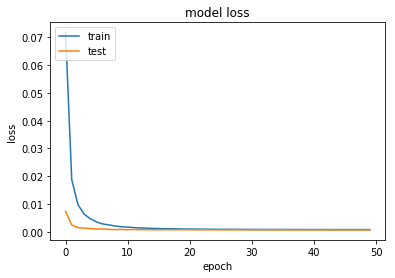

In [47]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
model.evaluate(test_x,test_y)

500/500 [==============================] - 0s     


0.0012357305358164012

In [49]:
check = model.predict(test_x)

/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


In [50]:
check = check*95

In [51]:
check[10]

array([ 65.92667389,  36.313694  ,  29.47575569,  36.86549759,
        59.13843918,  37.07318497,  71.96007538,  37.2777977 ,
        35.51356125,  37.08224869,  23.68302536,  37.05500031,
        56.68576431,  28.49666786,  78.43366241,  29.290308  ,
        38.26355743,  28.87605858,  16.38817024,  30.01310158,
        47.82040405,  54.20861816,  61.83177567,  74.44804382,
        33.93946838,  74.49360657,  47.53812027,  68.95323181,
        47.41110992,  82.16001129], dtype=float32)

## Results

In [52]:
#

def plot_predicted_image(features,keypoints):
    
    image_array = np.array([int(x.strip()) for x in features.split()])
    
    img = image_array.reshape((96,96))
    
    #plot image in grayscale
    plt.imshow(img, cmap='gray')


    #plot keypoints
    
    for i in range(len(keypoints)):
        if ((i) * 2)+1 <= len(keypoints):
            ind1 = (i) * 2
            ind2 = ind1+1
            
            keypoints = keypoints
            x,y = keypoints[ind1], keypoints[ind2]
            
            #add keypoint coordinates to the plot
            plt.scatter([x], [y])

    #show plot
    plt.show()
    

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  This is separate from the ipykernel package so we can avoid doing imports until


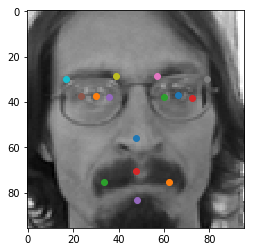

In [58]:
image_number = 150

plot_predicted_image(test_data.irow(image_number)[1],check[image_number])

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  """Entry point for launching an IPython kernel.


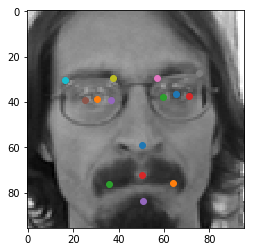

In [59]:
plot_predicted_image(test_data.irow(image_number)[1],[x for x in test_labels.irow(image_number)])

## Improvements 

Image agumentation would help in better generalization